In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Dell\Downloads\data\demo_data\5.outlier.csv",header=None)

In [3]:
data.shape

(600, 3)

In [4]:
data.head()

,0,1,2
0,-17.897000,7.662423,0
1,-26.343161,-3.055257,0
2,-19.059771,-8.531838,0
3,-16.383898,-2.352667,0
4,-12.926541,9.074994,0


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

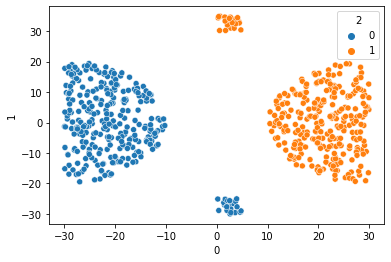

In [5]:
sns.scatterplot(data[0],data[1],hue=data[2])

In [6]:
data[2].value_counts()

0    300
1    300
Name: 2, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(data[[0,1]],data[2],test_size=0.1)

In [9]:
x_train.shape

(540, 2)

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
std=StandardScaler()

In [12]:
stdd=std.fit_transform(x_train)

In [14]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: google-auth<3,>=1.6.3 in c:\users\dell\anaconda3\lib\site-packages (from tensorboard<2.12,>=2.11->tensorflow-intel==2.11.0->tensorflow) (1.33.0)




[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import tensorflow

In [14]:
import tensorflow.keras 

In [15]:
from tensorflow.keras import Sequential

In [16]:
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization

model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(4,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

model=Sequential()
model.add(Dense(6,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(5,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.8))
model.add(Dense(4,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))

In [50]:
model=Sequential()
model.add(Dense(5000,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(5000,activation="relu",input_dim=2,kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(5000,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(5000,activation="relu",kernel_initializer="HeUniform"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(1,activation="sigmoid"))

In [51]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 5000)              15000     
                                                                 
 batch_normalization_20 (Bat  (None, 5000)             20000     
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 5000)              0         
                                                                 
 dense_26 (Dense)            (None, 5000)              25005000  
                                                                 
 batch_normalization_21 (Bat  (None, 5000)             20000     
 chNormalization)                                                
                                                                 
 dropout_21 (Dropout)        (None, 5000)             

In [52]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [53]:
save=model.fit(x_train,y_train,batch_size=10,epochs=20,verbose=1,validation_split=0.2)

Epoch 1/20
44/44 [==============================] - 46s 892ms/step - loss: 1.2737 - accuracy: 0.9074 - val_loss: 2.0622 - val_accuracy: 0.9630
Epoch 2/20
44/44 [==============================] - 40s 907ms/step - loss: 0.4178 - accuracy: 0.9560 - val_loss: 4.6711e-18 - val_accuracy: 1.0000
Epoch 3/20
44/44 [==============================] - 42s 946ms/step - loss: 0.1404 - accuracy: 0.9722 - val_loss: 4.6146e-07 - val_accuracy: 1.0000
Epoch 4/20
44/44 [==============================] - 40s 908ms/step - loss: 0.0591 - accuracy: 0.9792 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/20
44/44 [==============================] - 38s 876ms/step - loss: 0.1184 - accuracy: 0.9769 - val_loss: 1.6288e-07 - val_accuracy: 1.0000
Epoch 6/20
44/44 [==============================] - 39s 891ms/step - loss: 0.3332 - accuracy: 0.9329 - val_loss: 1.0580e-04 - val_accuracy: 1.0000
Epoch 7/20
44/44 [==============================] - 40s 898ms/step - loss: 0.0443 - accuracy: 0.9838 - val_loss: 2.2859e-05 - 

In [54]:
tl=save.history["loss"]
cvl=save.history["val_loss"]

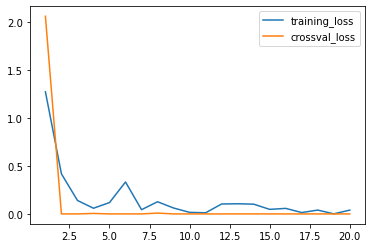

In [55]:
import matplotlib.pyplot as plt
plt.plot(range(1,21),tl,label="training_loss")
plt.plot(range(1,21),cvl,label="crossval_loss")
plt.legend()

In [56]:
predi=model.predict(x_train)

17/17 [==============================] - 1s 37ms/step


In [57]:
import numpy as np

In [58]:
preict=np.where(predi>0.5,1,0).flatten()

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
accuracy_score(y_train,preict)


1.0

In [61]:
from mlxtend.plotting import plot_decision_regions

3888/3888 [==============================] - 188s 48ms/step


<AxesSubplot:>

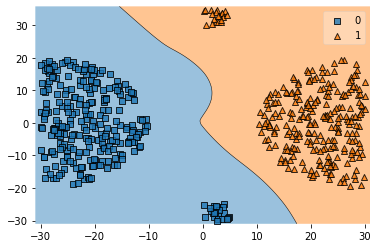

In [62]:
plot_decision_regions(x_train[[0,1]].values,y_train.values.astype(int),clf=model)